# <center>Analysis of How the Number of Branches Per Simulation Affects Performance</center>

This file is an interactive notebook to analyze the data obtained from tests.<br>
It focuses on examining what happens when the branching factor of each hypergame is increased. A lower branching factor leads to greater exploration of the overall tree, but it means that it is more likely that each hypergame will need to backtrack.

Since kriegTTT_4x4 has a maximum of 16 possible moves, a branching factor of 16 is the highest since this will branch the initial state in every possible way up to the maximum number of hypergames. A branching factor of 2 is the minimum since each state will be updated once and branched once (the 2 includes the update process as well).<br>
It is expected that the branching factor of 2 will perform better since it can cover more of the tree and is therefore less sensitive to backtracking when it must occur, however it also increases the likelihood of backtracking.

NumHyperGames = 16<br>
NumProbes = 4

## Reading in the Data

First the match data must be read in.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
np.random.seed(42)

# Read in the csv files
numBranches_count = [16, 12, 8, 4, 2]
numNames = ['numBranches_16', 'numBranches_12', 'numBranches_8', 'numBranches_4', 'numBranches_2']
data = list()

for idx, name in enumerate(numNames):
    file_name = 'testOutput/kriegTTT_4x4/numBranches/' + name + '/testOutput.csv'
    data.append(pd.DataFrame)
    data[idx] = pd.read_csv(file_name, header=0)

# Print the first 5 rows of the data
for game in data:
    display(game.head())

,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranches16_0,kriegTTT_4x4,2,1592997598774,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranches16_1,kriegTTT_4x4,2,1592997614821,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranches16_2,kriegTTT_4x4,2,1592997631757,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranches16_3,kriegTTT_4x4,2,1592997916218,10,300,XPLAYER,9,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranches16_4,kriegTTT_4x4,2,1592997925905,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranches12_0,kriegTTT_4x4,2,1593047077390,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranches12_1,kriegTTT_4x4,2,1593047086655,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranches12_2,kriegTTT_4x4,2,1593047095464,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranches12_3,kriegTTT_4x4,2,1593047143574,10,300,XPLAYER,7,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranches12_4,kriegTTT_4x4,2,1593047160714,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranches8_0,kriegTTT_4x4,2,1592969887863,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranches8_1,kriegTTT_4x4,2,1592969902532,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranches8_2,kriegTTT_4x4,2,1592969913065,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranches8_3,kriegTTT_4x4,2,1592970189025,10,300,XPLAYER,8,xplayer,HYPER,0,oplayer,IMPRANDOM,100
4,hypertest_numBranches8_4,kriegTTT_4x4,2,1592970203760,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranches4_0,kriegTTT_4x4,2,1592991074299,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranches4_1,kriegTTT_4x4,2,1592991083817,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranches4_2,kriegTTT_4x4,2,1592991094965,10,300,XPLAYER,4,xplayer,HYPER,0,oplayer,IMPRANDOM,100
3,hypertest_numBranches4_3,kriegTTT_4x4,2,1592991101459,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranches4_4,kriegTTT_4x4,2,1592991127048,10,300,XPLAYER,6,xplayer,HYPER,0,oplayer,IMPRANDOM,100


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numBranches2_0,kriegTTT_4x4,2,1592994096002,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numBranches2_1,kriegTTT_4x4,2,1592994107396,10,300,XPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numBranches2_2,kriegTTT_4x4,2,1592994111566,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numBranches2_3,kriegTTT_4x4,2,1592994128756,10,300,XPLAYER,7,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numBranches2_4,kriegTTT_4x4,2,1592994168975,10,300,XPLAYER,7,xplayer,HYPER,100,oplayer,IMPRANDOM,0


Next, the move data should be read in for each match

*Note: time_to_update and time_to_select_move are in milliseconds*

In [18]:
move_list_games = list()
for idx, name in enumerate(numNames):
    file_name_prefix = 'testOutput/kriegTTT_4x4/numBranches/' + name + '/moveset/'
    temp_move_list = list()
    for match_name in data[idx]['match_id']:
        file_name = file_name_prefix + match_name + '.csv'
        temp_move_list.append(pd.read_csv(file_name, header=0))
    move_list_games.append(temp_move_list)

# Verify by printing the head of the first game
for move_list in move_list_games:
    display(move_list[0])

,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranches16_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 2 3 )
1,hypertest_numBranches16_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,492,(MARK 2 2 )
2,hypertest_numBranches16_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,15,0,(MARK 2 1 )
3,hypertest_numBranches16_0,kriegTTT_4x4,1,XPLAYER,hyper,15,4,15,4670,(MARK 4 2 )
4,hypertest_numBranches16_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,53,0,(MARK 4 3 )
5,hypertest_numBranches16_0,kriegTTT_4x4,2,XPLAYER,hyper,16,4,22,3552,(MARK 3 2 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranches12_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,2,0,(MARK 1 2 )
1,hypertest_numBranches12_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,2,475,(MARK 2 1 )
2,hypertest_numBranches12_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,21,0,(MARK 4 3 )
3,hypertest_numBranches12_0,kriegTTT_4x4,1,XPLAYER,hyper,12,4,11,3510,(MARK 3 1 )
4,hypertest_numBranches12_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,59,0,(MARK 3 2 )
5,hypertest_numBranches12_0,kriegTTT_4x4,2,XPLAYER,hyper,16,4,20,3507,(MARK 4 1 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranches8_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,4,0,(MARK 2 3 )
1,hypertest_numBranches8_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,4,544,(MARK 3 3 )
2,hypertest_numBranches8_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,21,0,(MARK 3 3 )
3,hypertest_numBranches8_0,kriegTTT_4x4,1,XPLAYER,hyper,8,4,12,2139,(MARK 2 3 )
4,hypertest_numBranches8_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,116,0,(MARK 4 4 )
5,hypertest_numBranches8_0,kriegTTT_4x4,2,XPLAYER,hyper,16,4,64,3871,(MARK 3 2 )
6,hypertest_numBranches8_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,53,0,(MARK 2 1 )
7,hypertest_numBranches8_0,kriegTTT_4x4,3,XPLAYER,hyper,16,4,30,2456,(MARK 3 1 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranches4_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 3 2 )
1,hypertest_numBranches4_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,543,(MARK 3 3 )
2,hypertest_numBranches4_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,21,0,(MARK 4 3 )
3,hypertest_numBranches4_0,kriegTTT_4x4,1,XPLAYER,hyper,4,4,6,1196,(MARK 2 3 )
4,hypertest_numBranches4_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,37,0,(MARK 3 3 )
5,hypertest_numBranches4_0,kriegTTT_4x4,2,XPLAYER,hyper,16,4,6,2755,(MARK 1 3 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numBranches2_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 1 3 )
1,hypertest_numBranches2_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,489,(MARK 4 4 )
2,hypertest_numBranches2_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,16,0,(MARK 4 2 )
3,hypertest_numBranches2_0,kriegTTT_4x4,1,XPLAYER,hyper,2,4,0,704,(MARK 4 2 )
4,hypertest_numBranches2_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,131,0,(MARK 4 1 )
5,hypertest_numBranches2_0,kriegTTT_4x4,2,XPLAYER,hyper,4,4,16,1221,(MARK 2 4 )
6,hypertest_numBranches2_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,47,0,(MARK 4 2 )
7,hypertest_numBranches2_0,kriegTTT_4x4,3,XPLAYER,hyper,8,4,0,1938,(MARK 3 4 )


## Analysis of Data

### Overall Agent Results

The average score of the agent will be calculated across all games

The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 16 branches is 97.96% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 12 branches is 89.36% for 47 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 8 branches is 88.00% for 50 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 4 branches is 84.00% for 50 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 2 branches is 89.13% for 46 games


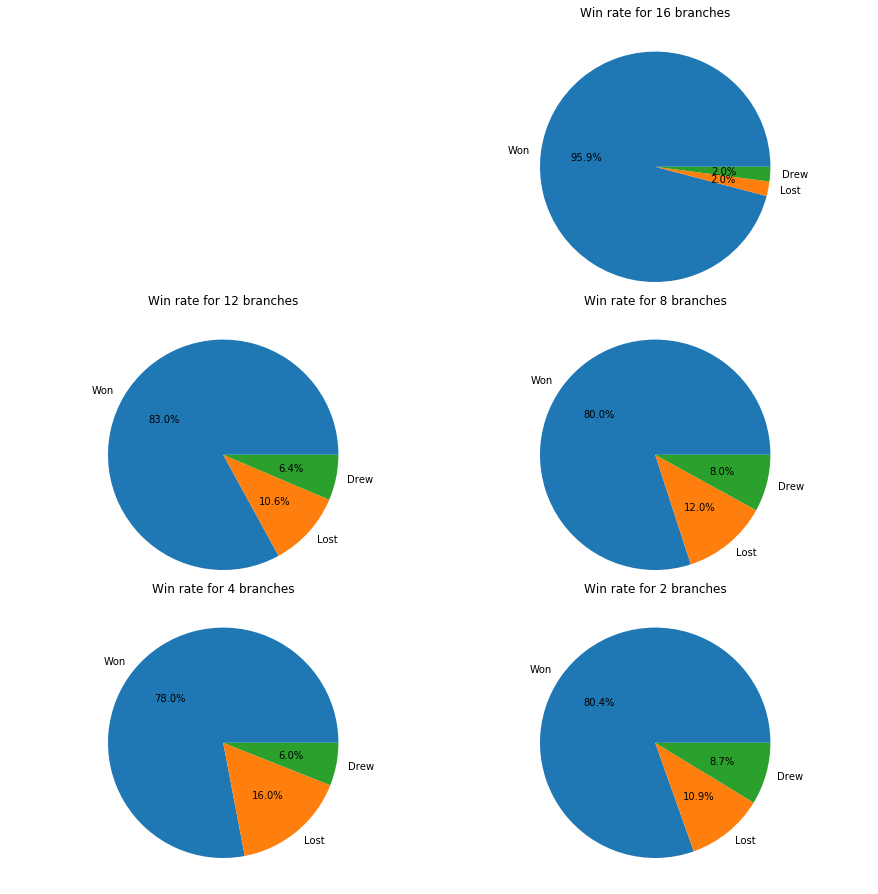

In [19]:
count_games_completed = list()
for idx, game in enumerate(data):
    total_score = data[idx]['player_1_score'].sum(skipna = True)
    total_count = len(data[idx]['player_1_score'])
    count_games_completed.append(total_count)
    print(f"The win/draw rate for the agent \"" + str(data[idx]['player_1'][0]) + "\" playing the game \"" + str(data[idx]['game_name'][0]) + "\" with " + str(numBranches_count[idx]) + f" branches is {(total_score/total_count):.2f}% for " + str(total_count) + " games")

# Display a pie chart
fig = plt.figure()
data_len = len(data)
win_count = list()
for idx, game in enumerate(data):
    ax = fig.add_axes([(data_len - idx)%2,math.ceil((data_len - idx)/2),1,1])
    ax.axis('equal')
    ax.set_title('Win rate for ' + str(numBranches_count[idx]) + ' branches')
    result = ['Won', 'Lost', 'Drew']
    game_count = [len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 0)]), len(game[(game['player_1_score'] == 0) & (game['player_2_score'] == 100)]), len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 100)])]
    win_count.append(game_count[0])
    ax.pie(game_count, labels = result,autopct='%1.1f%%')
plt.show()

These results are not what was expected. This may be due to the fact that when games are short (average of 4 moves), the games with more hypergames are better able to run more simulations for every possible move and therefore get a better approximation of the optimal move, even if there is less variety of states.<br>
This is supported by the image below which shows that the lower branching factor leads to less time taken to choose the optimal move for steps 0-4, at which point, they are approximately the same. Since most games only last ~4 moves, the agents with a higher branching factor are winning due to having more time to calculate the optimal move.

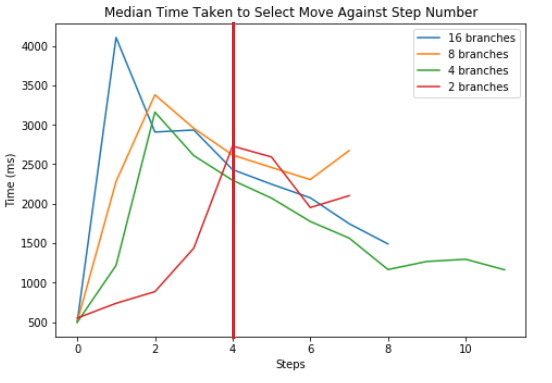

I will now run tests that take this into account by running 96 simulations per move regardless the number of hypergames. I will do this by running `(numProbes * (16 / numHypergames))` simulations per hypergame resulting in 96 hypergames when `numProbes = 6` for any number of hypergames. I chose `numProbes = 6` since this ensures the number of simulations will be even for all powers of 2 and the number 12. Refer to the book titled **TestAnalysisNumBranchesFixedStimulation** for more information.<br>
It is reasonable to assume that the number of simulations should be irrespective of the branch factor for a final version, since an anytime algorithm should update the state and run simulations to better approximate the best move until it runs out of time, rather than stopping early. Improvements will be made and tested to ensure this occurs for the move selection function.

It is now worth looking into how performance changes with a lower branching factor.<br>
First I will consider the number of games that can be completed without error compared to the number of branches.

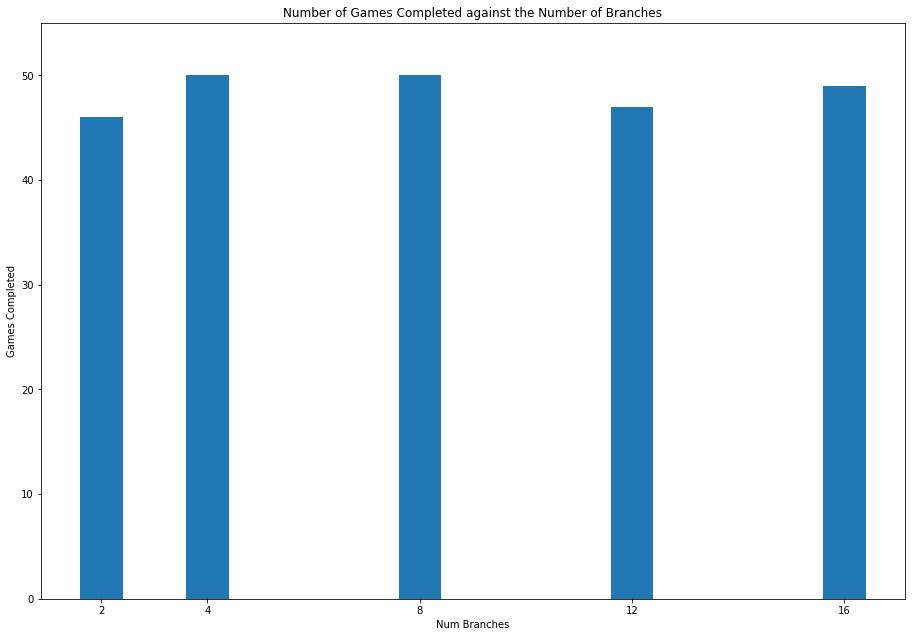

In [20]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2], label='state_update')
ax1.set_title('Number of Games Completed against the Number of Branches')
ax1.set_xlabel('Num Branches')
ax1.set_ylabel('Games Completed')
ax1.set_yscale('linear')
ax1.set_xticks(numBranches_count)
ax1.set_ylim([0,55])
ax1.bar(numBranches_count, count_games_completed)
plt.show()

I will now consider how the ratio of games completed compares against the number of branches

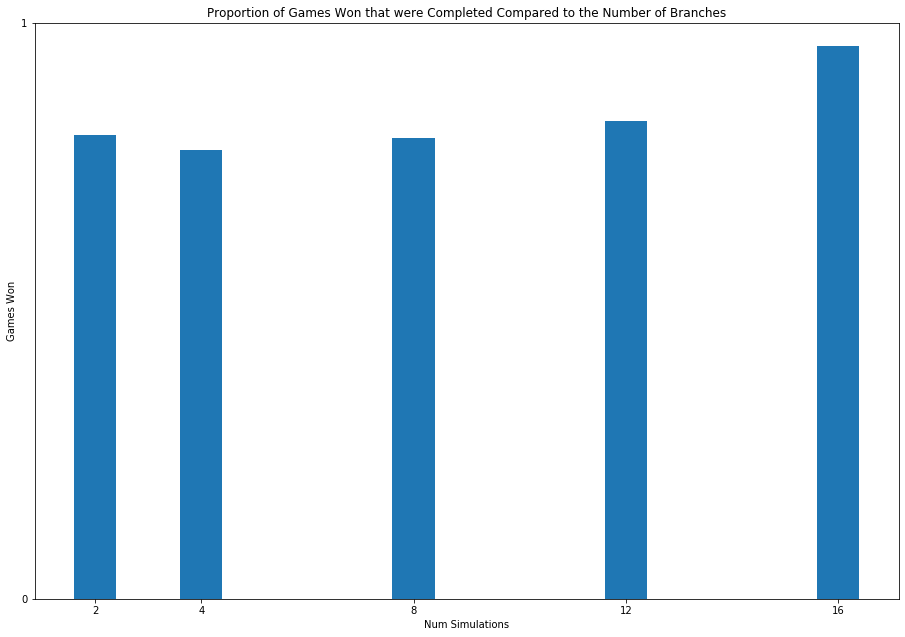

In [21]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Proportion of Games Won that were Completed Compared to the Number of Branches')
ax1.set_xlabel('Num Simulations')
ax1.set_ylabel('Games Won')
ax1.set_yscale('linear')
ax1.set_xticks(numBranches_count)
ax1.set_yticks(range(0,2,1))
ax1.set_ylim([0,1])
ax1.bar(numBranches_count, np.divide(win_count,count_games_completed))
plt.show()

I will now consider the average time taken to win for various hypergames.

*Note: It is +1 because step increments from 0*

16 simulations
	Mean steps to win: 4
	Median steps to win: 4
12 simulations
	Mean steps to win: 3
	Median steps to win: 4
8 simulations
	Mean steps to win: 3
	Median steps to win: 4.0
4 simulations
	Mean steps to win: 4
	Median steps to win: 4
2 simulations
	Mean steps to win: 4
	Median steps to win: 4


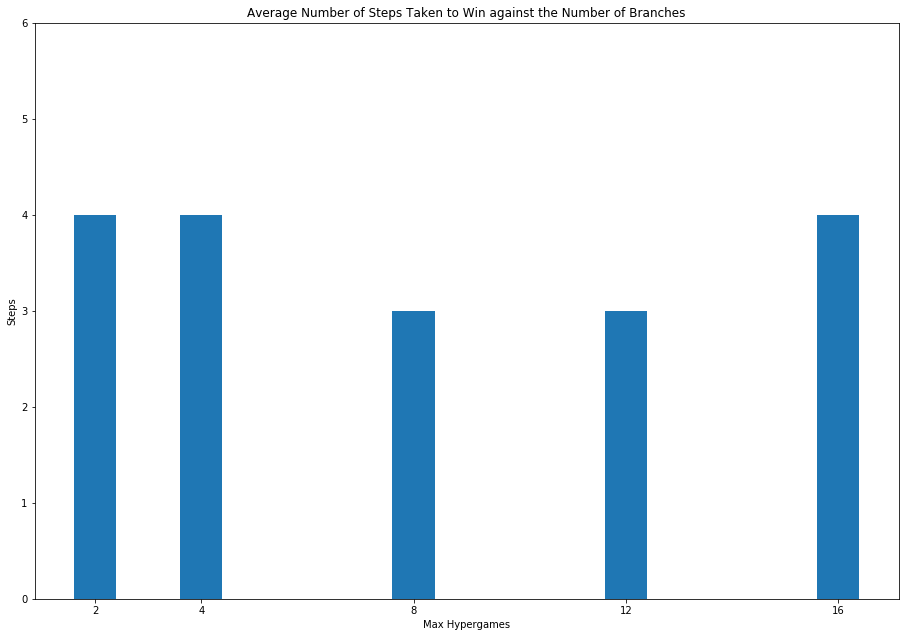

In [22]:
# Calculate the average number of steps taken to win for each hypergame
steps_to_win_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    game_steps_to_win_list = list()
    winning_games = game[((game['player_1_score'] == 100) & (game['player_2_score'] == 0))] 
    winning_games_list = winning_games['match_id'].tolist()
    for moves in move_list:
        if(moves['match_id'][0] in winning_games_list):
            move_length = len(moves['match_id'])
            game_steps_to_win_list.append(moves['step'][move_length - 1] + 1)
    steps_to_win_list.append(game_steps_to_win_list)

# Print steps to win
mean_steps_to_win = list()
median_steps_to_win = list()
for idx, game_steps_to_win in enumerate(steps_to_win_list):
    mean = statistics.mean(game_steps_to_win)
    print(f'{numBranches_count[idx]} simulations')
    print(f'\tMean steps to win: {mean}')
    print(f'\tMedian steps to win: {statistics.median(game_steps_to_win)}')
    mean_steps_to_win.append(mean)

# Graph steps to win
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Average Number of Steps Taken to Win against the Number of Branches')
ax1.set_xlabel('Max Hypergames')
ax1.set_ylabel('Steps')
ax1.set_yscale('linear')
ax1.set_xticks(numBranches_count)
ax1.set_yticks(range(0,10,1))
ax1.set_ylim([0,6])
ax1.bar(numBranches_count, mean_steps_to_win)
plt.show()

### Move Results

Calculating the average move time per game.
This is expected to grow with the depth of the game and is expected to be different for the state update and the move selection.

In [23]:
class Tracker:
    '''
    Tracker tracks the average time for each move of each game played
    '''
    def __init__(self):
        self.time_sum = 0
        self.num_moves = 0
        self.times = list()
    
    def __str__(self):
        return "time_sum: " + str(self.time_sum) + " ms\n\tnum_moves: " + str(self.num_moves) + "\n\tmean_time: " + str(statistics.mean(self.times)) + "\n\tmedian_time: " + str(statistics.median(self.times)) + " ms\n\ttimes (ms): " + str(self.times)
    
    def addMove(self, num):
        self.time_sum += num
        self.num_moves+=1
        self.times.append(num)
    
    def getMeanTime(self):
        return statistics.mean(self.times)
    
    def getMedianTime(self):
        return statistics.median(self.times)

# Add the results for each move of each game played to a list of trackers for the update and select move times for the chosen player
time_to_update_list = list()
time_to_select_move_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    temp_time_to_update_list = list()
    temp_time_to_select_move_list = list()
    player_name = game['role_1'][0].upper()
    for move_set in move_list:
        for index, move_row in move_set.iterrows():
            if move_row['role_name'] == player_name:
                if move_row['step'] > len(temp_time_to_update_list) - 1:
                    temp_time_to_update_list.append(Tracker())
                    temp_time_to_select_move_list.append(Tracker())
                temp_time_to_update_list[move_row['step']].addMove(move_row['time_to_update'])
                temp_time_to_select_move_list[move_row['step']].addMove(move_row['time_to_select_move'])
    time_to_update_list.append(temp_time_to_update_list)
    time_to_select_move_list.append(temp_time_to_select_move_list)

# Print the data
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    print(str(numBranches_count[game_num]) + ' branches')
    for idx, (update_step, select_step) in enumerate(zip(game_time_to_update_list, game_time_to_select_move_list)):
        print('\tStep: ' + str(idx) + "\n")
        print('\tTime taken to update states:')
        print('\t' + str(update_step)  + "\n")
        print('\tTime taken to select move:')
        print('\t' + str(select_step)  + "\n\n\n")

16 branches
	Step: 0

	Time taken to update states:
	time_sum: 3 ms
	num_moves: 49
	mean_time: 0.061224489795918366
	median_time: 0 ms
	times (ms): [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

	Time taken to select move:
	time_sum: 24897 ms
	num_moves: 49
	mean_time: 508.1020408163265
	median_time: 502 ms
	times (ms): [492, 662, 458, 533, 494, 482, 548, 517, 510, 541, 514, 550, 475, 531, 518, 559, 514, 472, 497, 535, 501, 520, 476, 538, 560, 502, 454, 483, 485, 502, 499, 497, 508, 509, 483, 580, 487, 484, 517, 498, 548, 551, 502, 470, 477, 489, 449, 453, 473]



	Step: 1

	Time taken to update states:
	time_sum: 885 ms
	num_moves: 49
	mean_time: 18.06122448979592
	median_time: 16 ms
	times (ms): [15, 26, 15, 15, 16, 16, 21, 19, 16, 22, 16, 15, 15, 22, 16, 6, 22, 15, 22, 16, 22, 22, 22, 22, 16, 15, 16, 16, 16, 22, 16, 16, 22, 16, 16, 16, 15, 15, 22, 16, 23, 29, 22, 15, 22, 22, 16, 15,

Now I will graph the findings

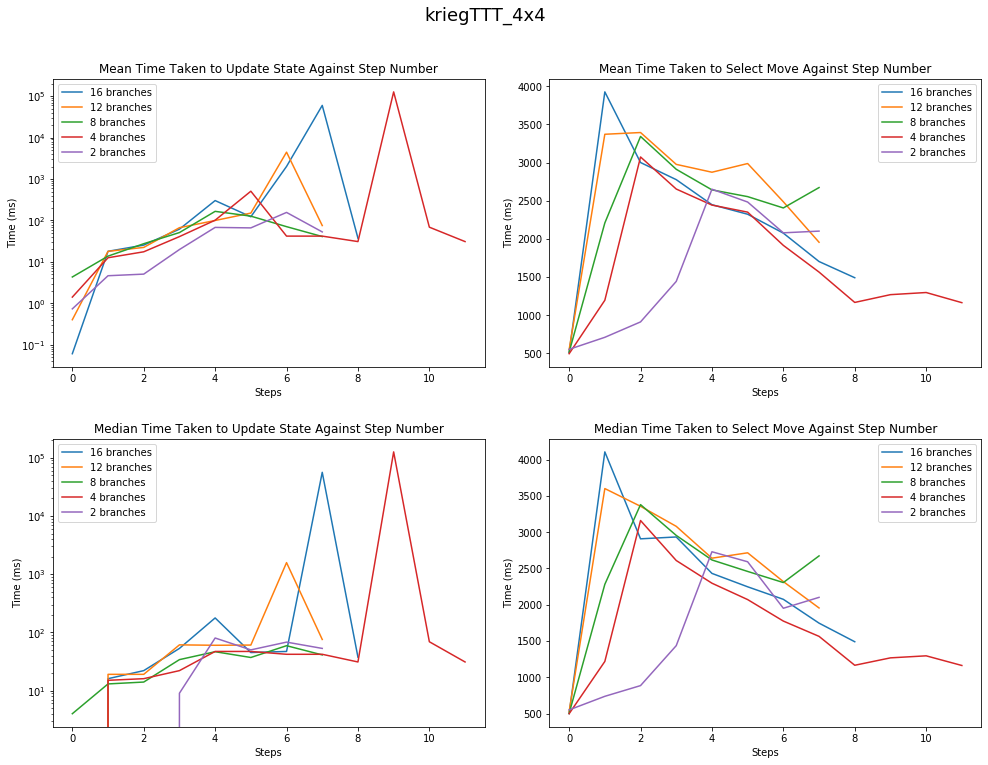

In [24]:
# Add the data to an array
mean_state_update_times = list()
mean_move_select_times = list()
median_state_update_times = list()
median_move_select_times = list()
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    temp_mean_state_update_times = list()
    temp_mean_move_select_times = list()
    temp_median_state_update_times = list()
    temp_median_move_select_times = list()
    for update_step, select_step in zip(game_time_to_update_list, game_time_to_select_move_list):
        temp_mean_state_update_times.append(update_step.getMeanTime())
        temp_mean_move_select_times.append(select_step.getMeanTime())
        temp_median_state_update_times.append(update_step.getMedianTime())
        temp_median_move_select_times.append(select_step.getMedianTime())
    mean_state_update_times.append(temp_mean_state_update_times)
    mean_move_select_times.append(temp_mean_move_select_times)
    median_state_update_times.append(temp_median_state_update_times)
    median_move_select_times.append(temp_median_move_select_times)

# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.5, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,1.25,1,1], label='state_update_mean')
ax1.set_title('Mean Time Taken to Update State Against Step Number')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
for idx, game_mean_state_update_times in enumerate(mean_state_update_times):
    ax1.plot(game_mean_state_update_times, label=str(numBranches_count[idx]) + ' branches')
ax1.legend()

# Draw mean graph for Move Select
ax2 = fig.add_axes([1.15,1.25,1,1], label='move_select_mean')
ax2.set_title('Mean Time Taken to Select Move Against Step Number')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Time (ms)')
ax2.set_yscale('linear')
for idx, game_mean_move_select_times in enumerate(mean_move_select_times):
    ax2.plot(game_mean_move_select_times, label=str(numBranches_count[idx]) + ' branches')
ax2.legend()

# Draw median graph for State Update
ax3 = fig.add_axes([0,0,1,1], label='state_update_median')
ax3.set_title('Median Time Taken to Update State Against Step Number')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Time (ms)')
ax3.set_yscale('log')
for idx, game_median_state_update_times in enumerate(median_state_update_times):
    ax3.plot(game_median_state_update_times, label=str(numBranches_count[idx]) + ' branches')
ax3.legend()

# Draw median graph for Move Select
ax4 = fig.add_axes([1.15,0,1,1], label='move_select_median')
ax4.set_title('Median Time Taken to Select Move Against Step Number')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Time (ms)')
ax4.set_yscale('linear')
for idx, game_median_move_select_times in enumerate(median_move_select_times):
    ax4.plot(game_median_move_select_times, label=str(numBranches_count[idx]) + ' branches')
ax4.legend()

plt.show()

These results seem to be due to the smaller branching factors taking longer to reach the max number of hypergames, but they seem to match approximately between steps 4-8, which is the point at which the number of hypergames are the same.